# **Логистическая регрессия**

**Задача классификации** (classification) — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным**.

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой** (многоклассовой). Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.
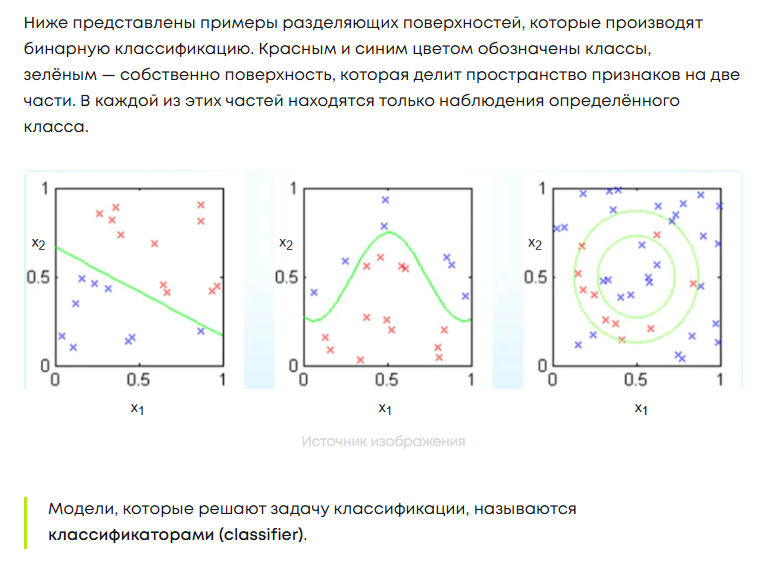

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
**Логистическая регрессия** (Logistic Regression) — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.
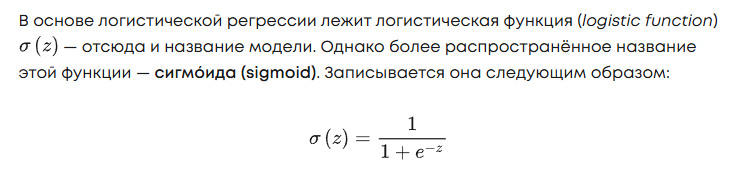
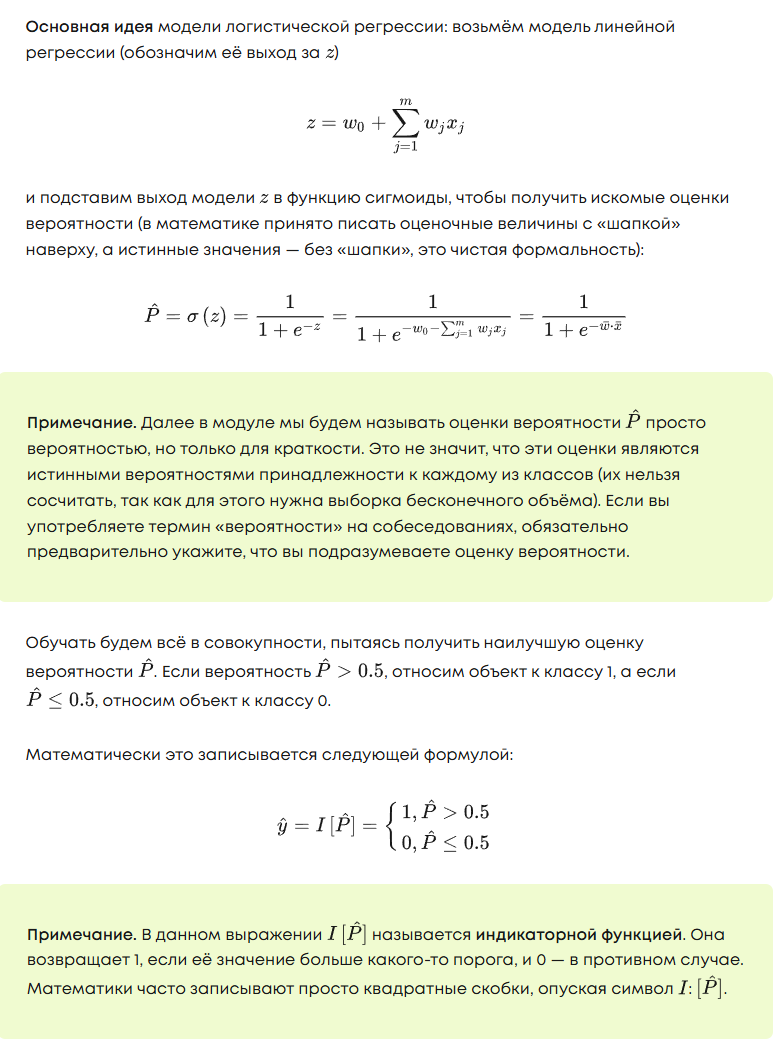

## ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Это метод максимального правдоподобия (Maximum Likelihood Estimation — MLE). 
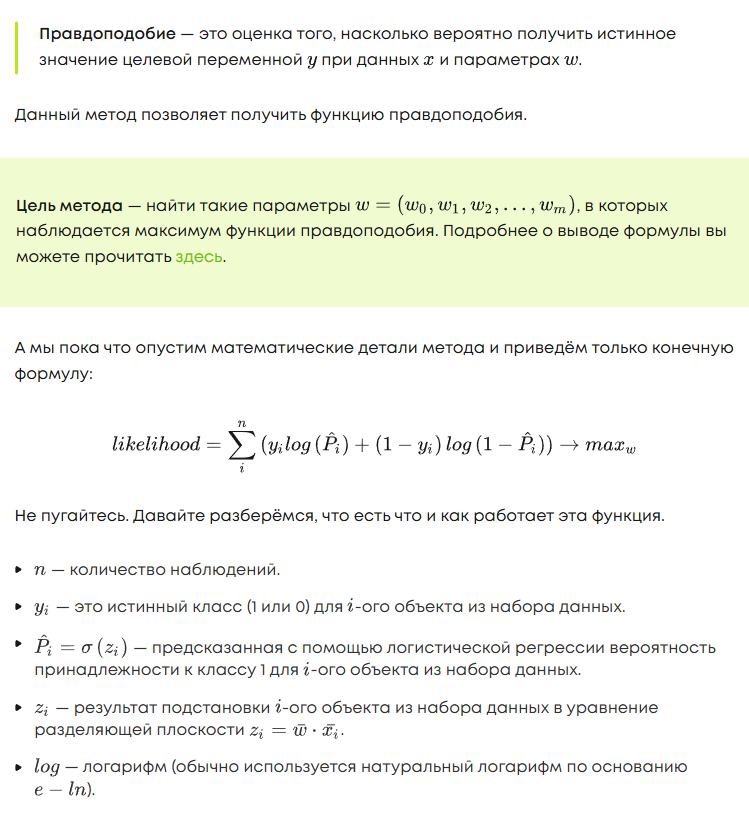

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

# Метрики классификации. Преимущества и недостатки логистической регрессии

**ОШИБКИ I И II РОДА С ТОЧКИ ЗРЕНИЯ КЛАССИФИКАЦИИ**
Будем считать класс 1 (диабет есть) положительным исходом (Positive), а класс 0 (диабета нет) — отрицательным (Negative).

Примечание. На первый взгляд такая терминология может показаться не совсем этичной, так как наличие диабета — это всё-таки отрицательный сценарий для пациента. Однако для унификации терминологии в машинном обучении в большинстве задач объекты класса 1 считаются объектами с наличием некоторого эффекта (болезнь есть / задолженность погашена / клиент ушёл / устройство отказало и т. д.), а объекты класса 0 — объектами с отсутствием этого эффекта (болезни нет / задолженность не погашена / клиент не ушёл / устройство работает без отказов и т. д.).
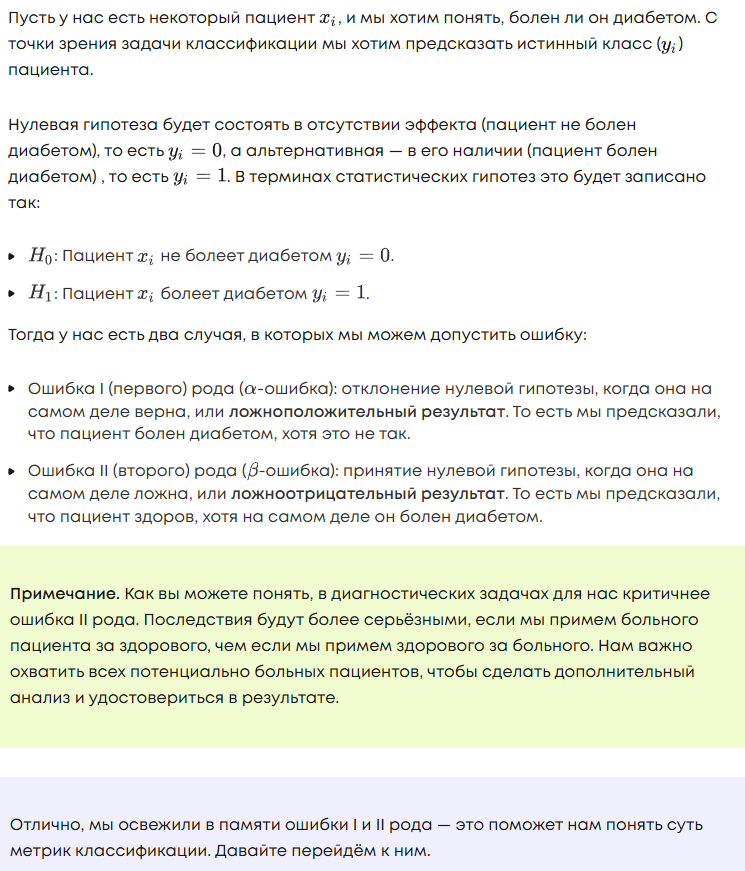

## МЕТРИКИ КЛАССИФИКАЦИИ
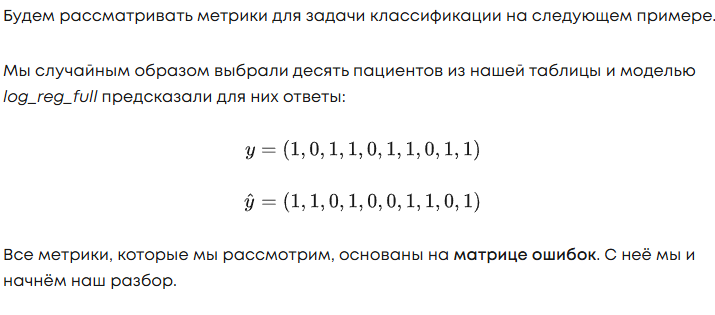
**Матрица ошибок** (confusion matrix) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.
Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта к одному из классов. Тогда каждая ячейка матрицы ошибок соответствует количеству объектов, попавших в одну из следующих четырёх категорий:
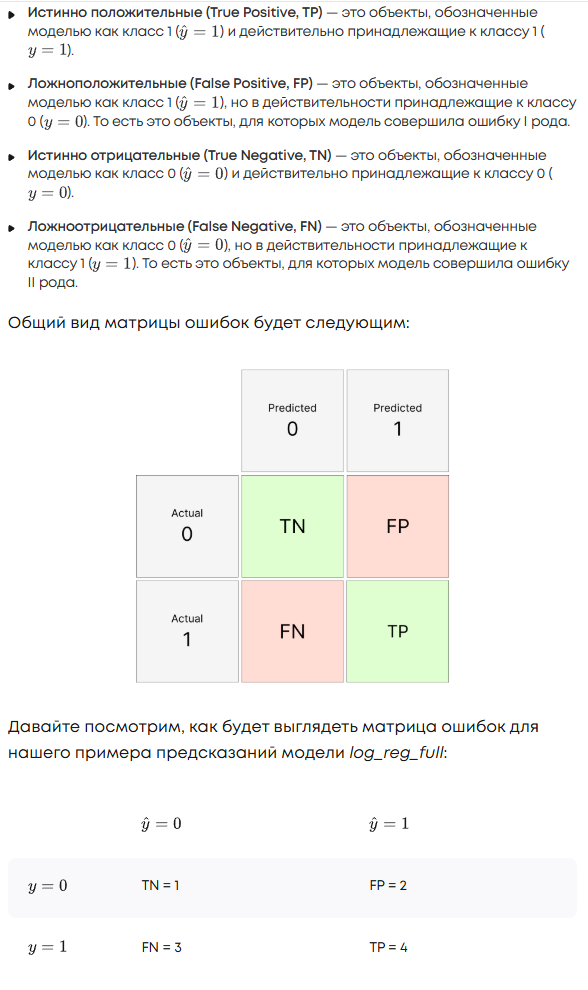

Для большей наглядности представим следующую ситуацию: у нас есть множество наблюдений двух классов (класс 1 — круги, класс 0 — квадраты). Пусть мы нарисовали некоторый круг и условились, что все объекты, лежащие в этом круге, мы будем считать классом 1, а объекты вне круга — классом 0. Тогда мы получим следующую картину:
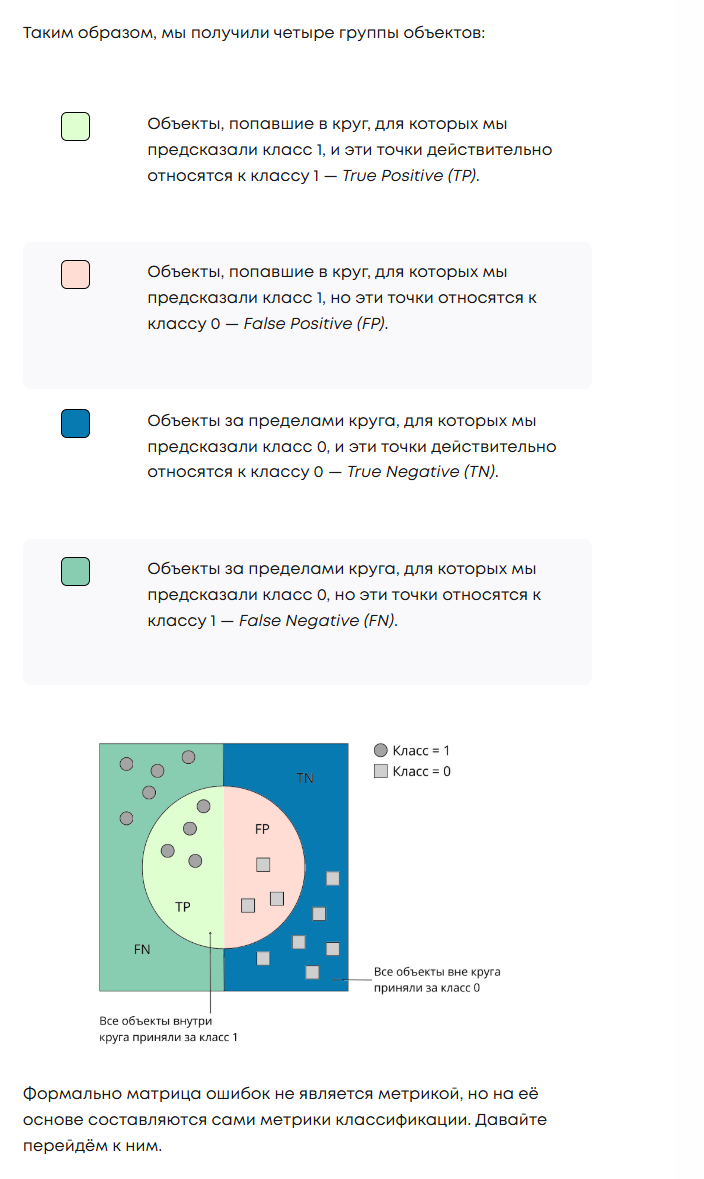

**Accuracy** (достоверность/аккуратность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):
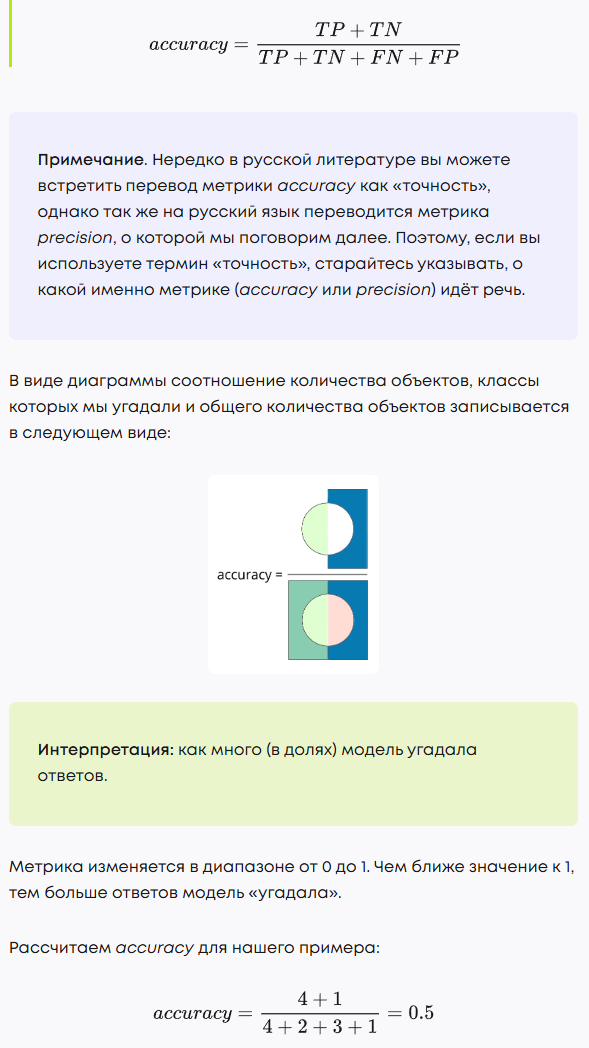

Итак, наша accuracy равна 0.5, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы. Продемонстрируем это следующим примером.

Допустим, мы хотим оценить работу спам-фильтра электронной почты. Спам-письма обозначены как Positive (1), а не спам — как Negative (0).

У нас есть 110 писем. Из них:

100 писем — не спам,
10 писем — спам.
Мы построили некоторый классификатор. Согласно результатам классификатора, из 100 писем класса «не спам» мы верно определили (отнесли к классу 0) 90, а оставшиеся 10 отнесли к классу «спам» (классу 1). То есть True Negative = 90, а False Positive = 10. Из 10 спам-писем мы верно определили 5 (отнесли к классу 1), а остальные 5 отнесли к классу «не спам» (классу 0). То есть True Positive = 5, а False Negative = 5.

Матрица ошибок будет иметь вид:
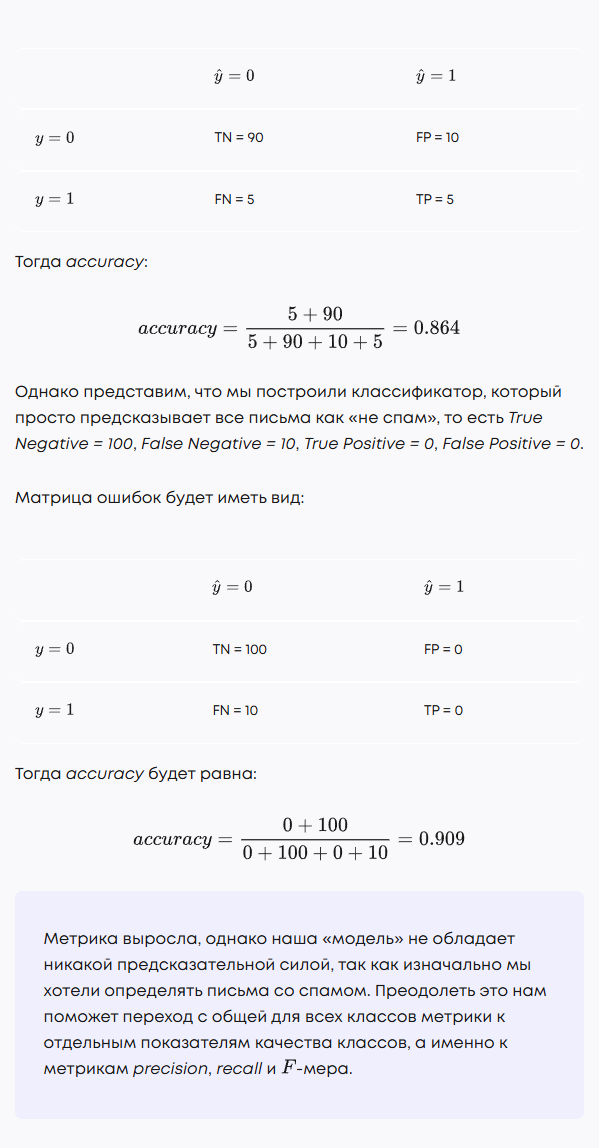
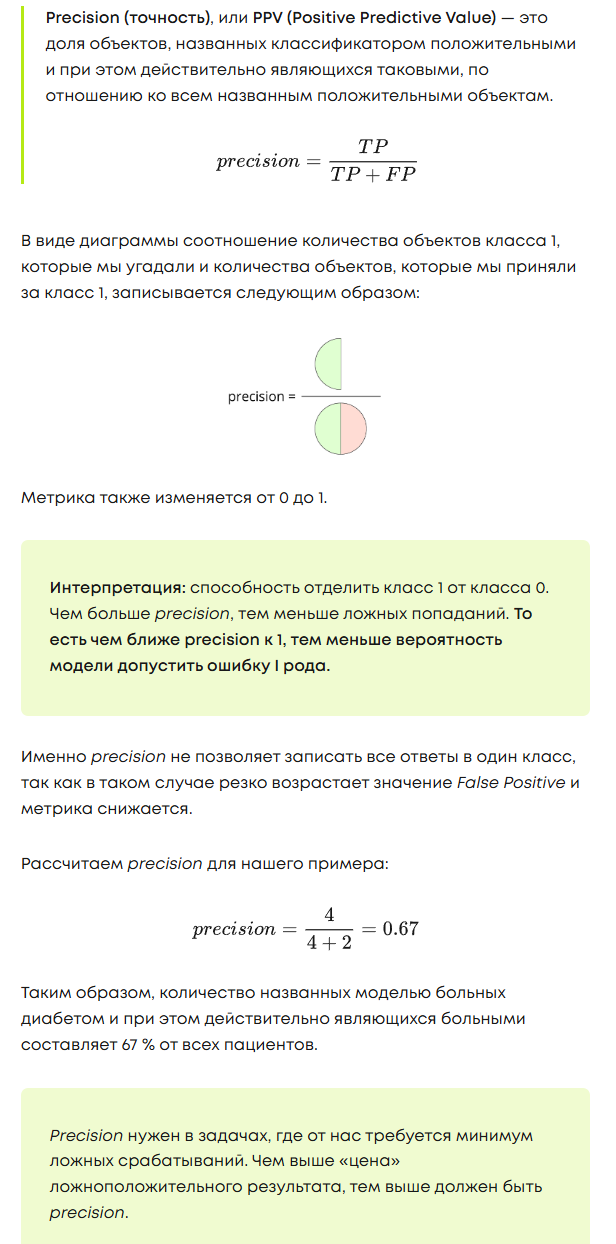
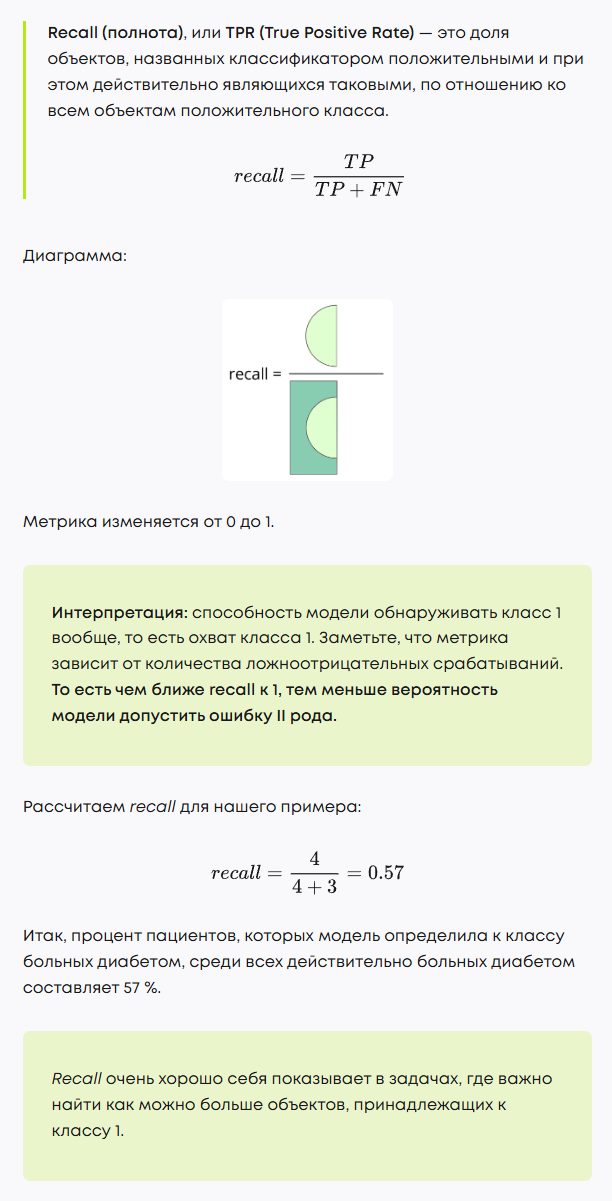
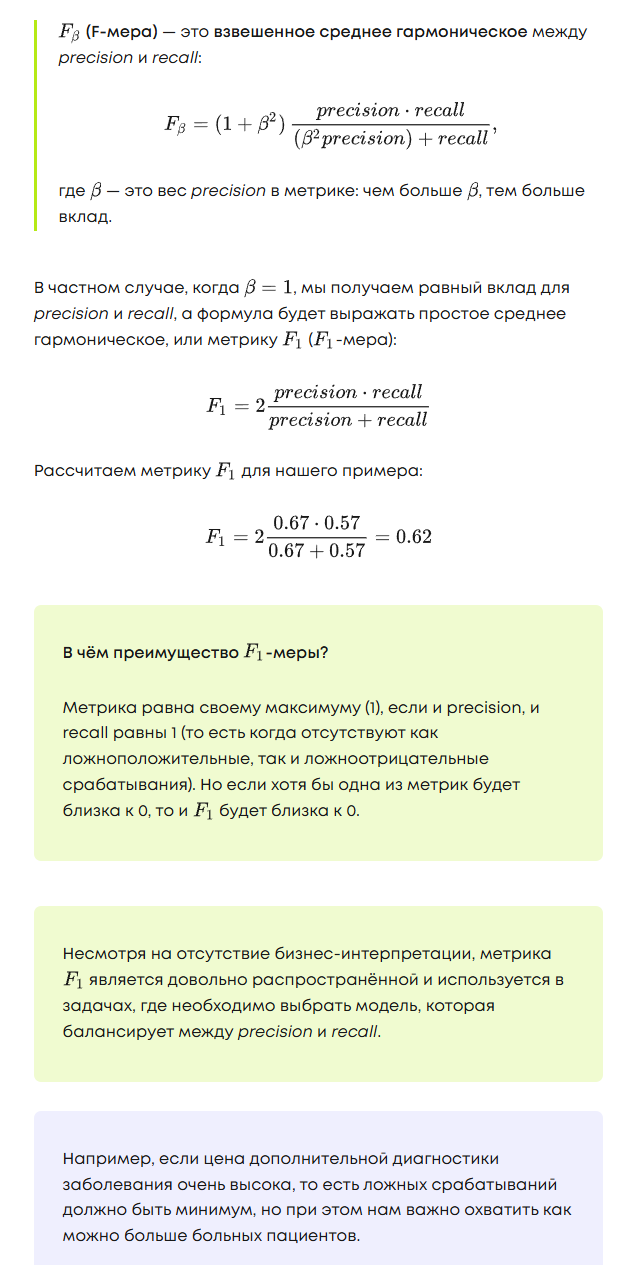

## ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ 
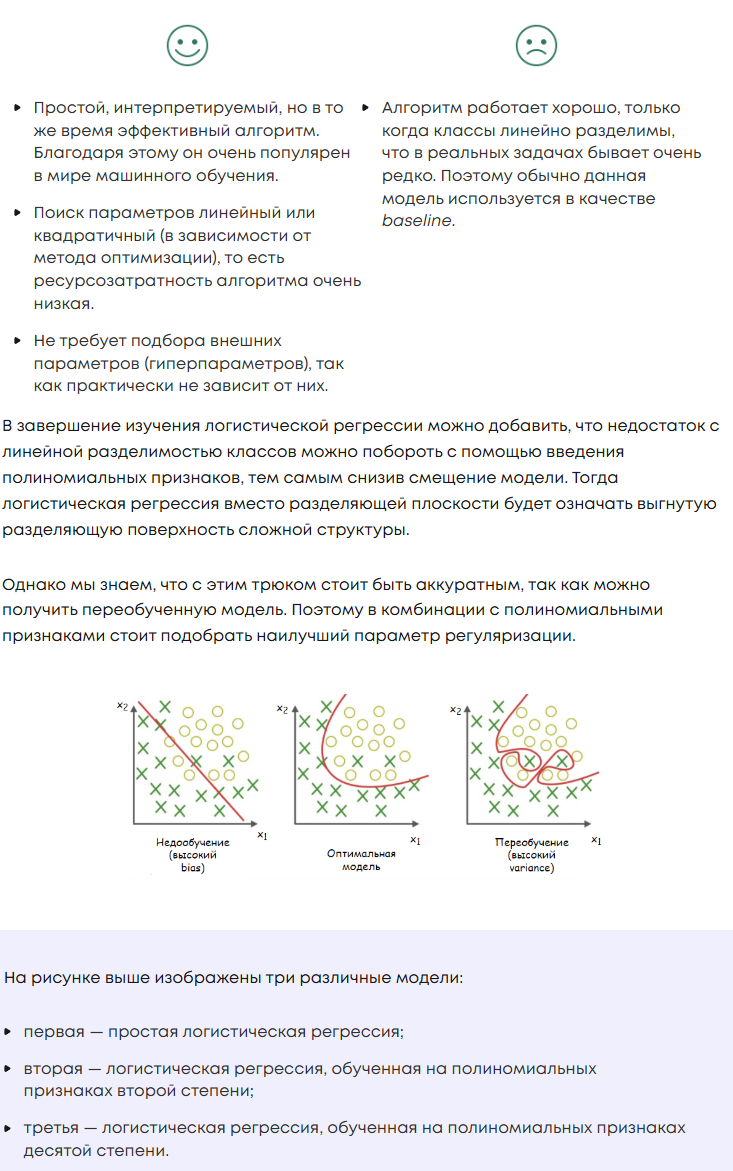
Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.

# Мультиклассовая классификация 
«один против всех» (one-vs-over).

Идея этого подхода очень простая. Если у нас есть  различных классов (), давайте обучим  классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

Схематично это можно представить следующим образом:
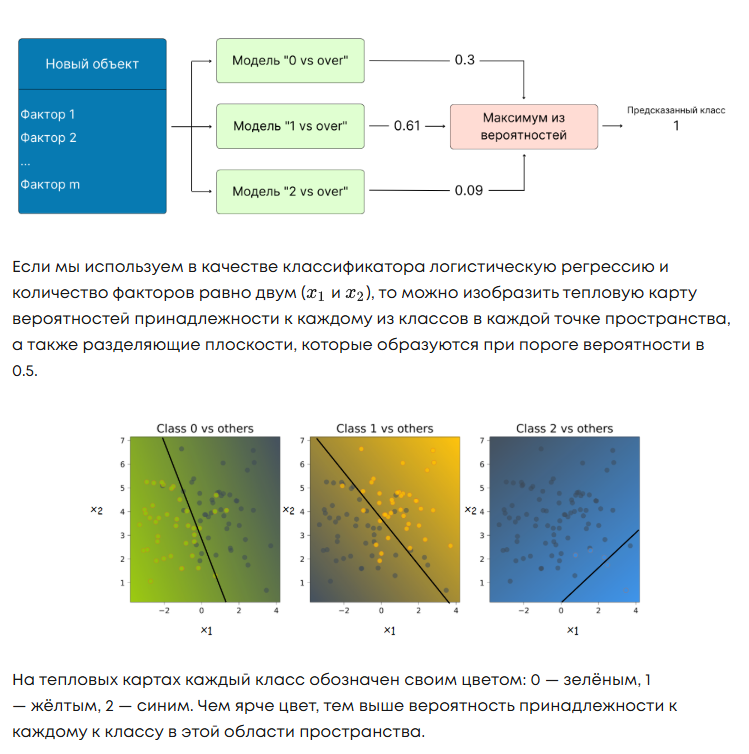
# МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ НА PYTHON
см. 3.1Мультиклассовая_классификация

#  Деревья решений
Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как случайный лес, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.

Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

Представьте, что у вас есть автомобиль, который вы решили застраховать. Вы приходите в страховую компанию, где вам дают заполнить анкету. По этой анкете сотрудник страховой компании будет принимать решение, стоит ли выдавать вам страховку.

Сотрудник в свою очередь будет руководствоваться примерно следующим регламентом:

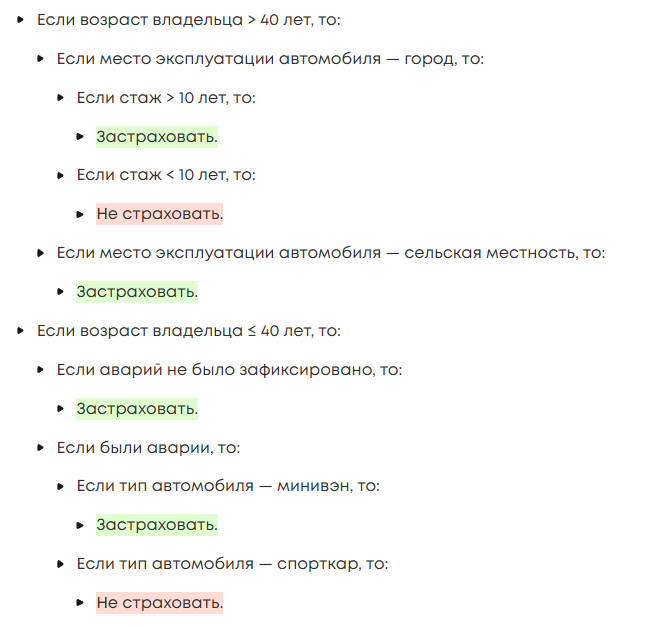
То есть сотрудник при принятии решения использует информацию, предоставленную вами в анкете, и подает её на вход вложенного условного оператора.

Для простоты восприятия можно представить такой подход визуально в виде следующего дерева:

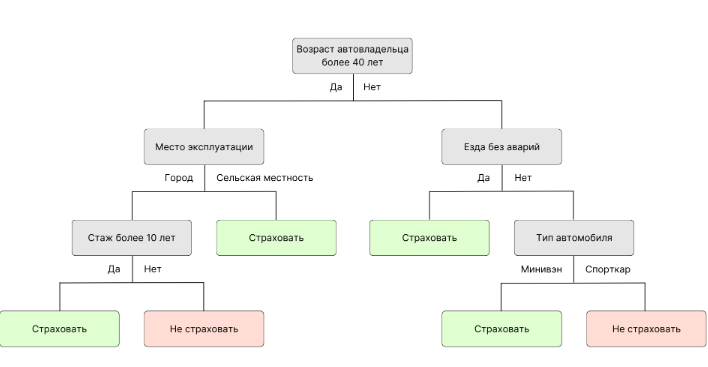
Аналогичным образом работает и алгоритм машинного обучения под названием «дерево решений» (Decision Tree). 

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

Вот ещё один пример дерева решений. Большинство из нас когда-нибудь играли в игру «Слова на лбу» или «Тарантинки». На лоб каждого из игроков приклеивается бумажка с написанным на ней словом. Игрок может задавать другим игрокам вопросы о загаданном ему предмете/животном/человеке и т. д. Другие игроки могут отвечать на вопросы только «Да» и «Нет». Цель — за минимальное количество вопросов догадаться, о чём идёт речь.

Логика «если …, то …» используется людьми повседневно и поэтому интуитивно понятна каждому из нас. На основании этих рассуждений можно построить мощный алгоритм машинного обучения.

Деревья решений находят своё применение во множестве прикладных задач.

Успешнее всего деревья применяют в следующих областях:

Банковское дело. Оценка кредитоспособности клиентов банка при выдаче кредитов.
Промышленность. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
Медицина. Диагностика заболеваний разной сложности.
Молекулярная биология. Анализ строения аминокислот.
Торговля. Классификация клиентов и товара.\
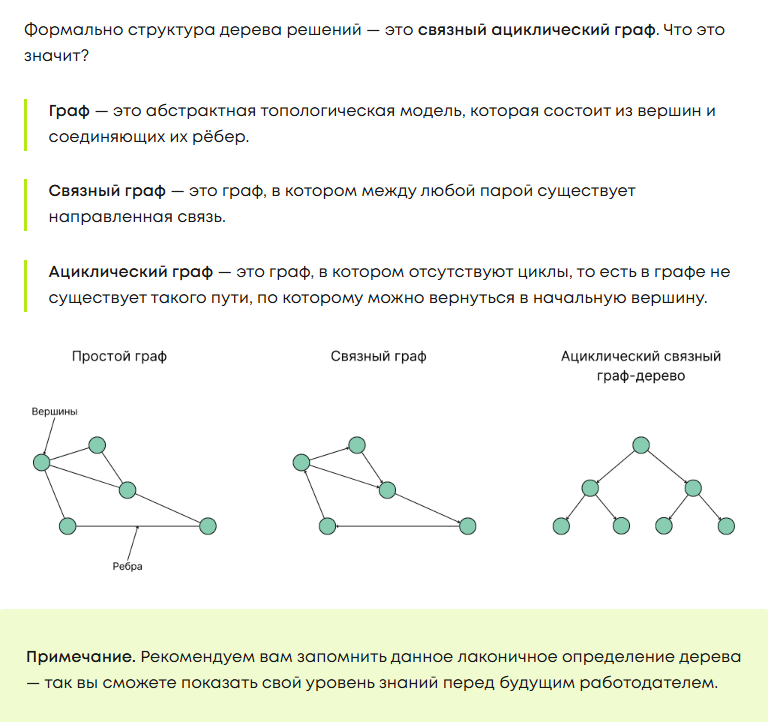
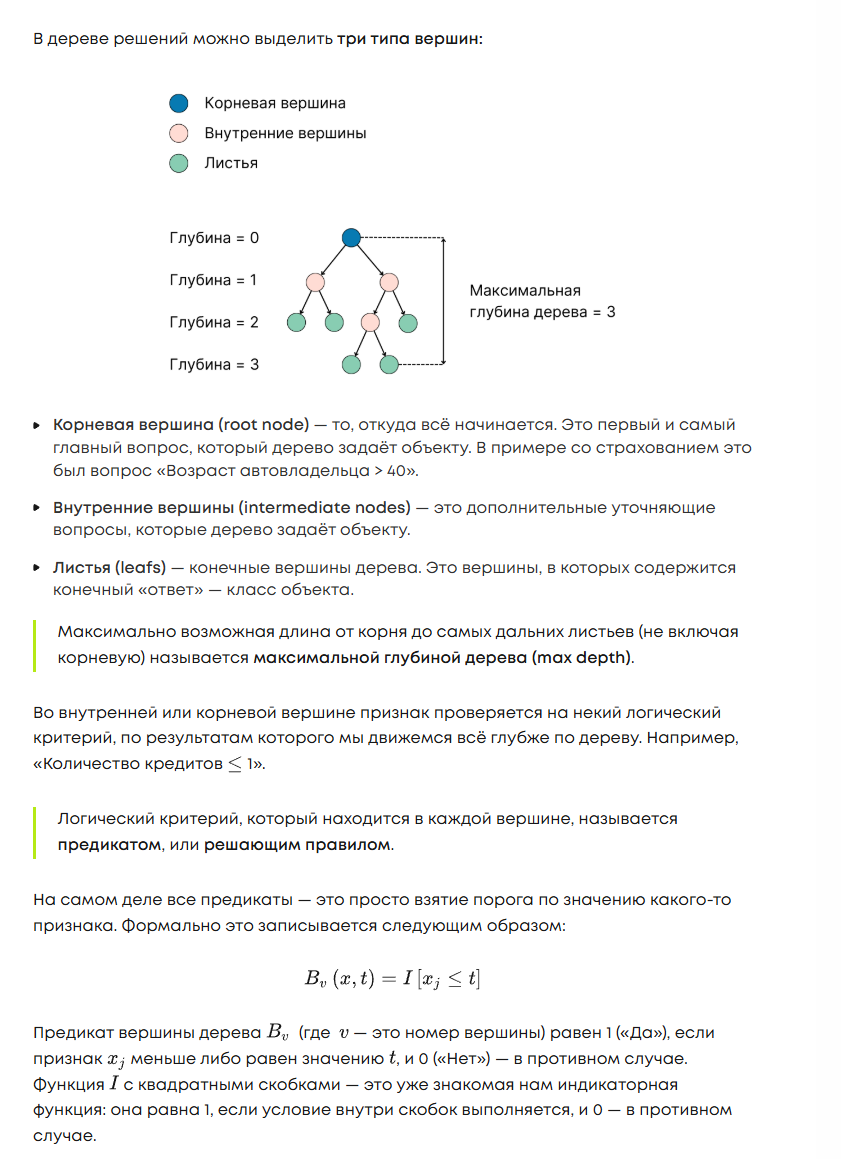
см.3.2Деревья_решений

## ДОСТОИНСТВА И НЕДОСТАТКИ ДЕРЕВЬЕВ РЕШЕНИЙ
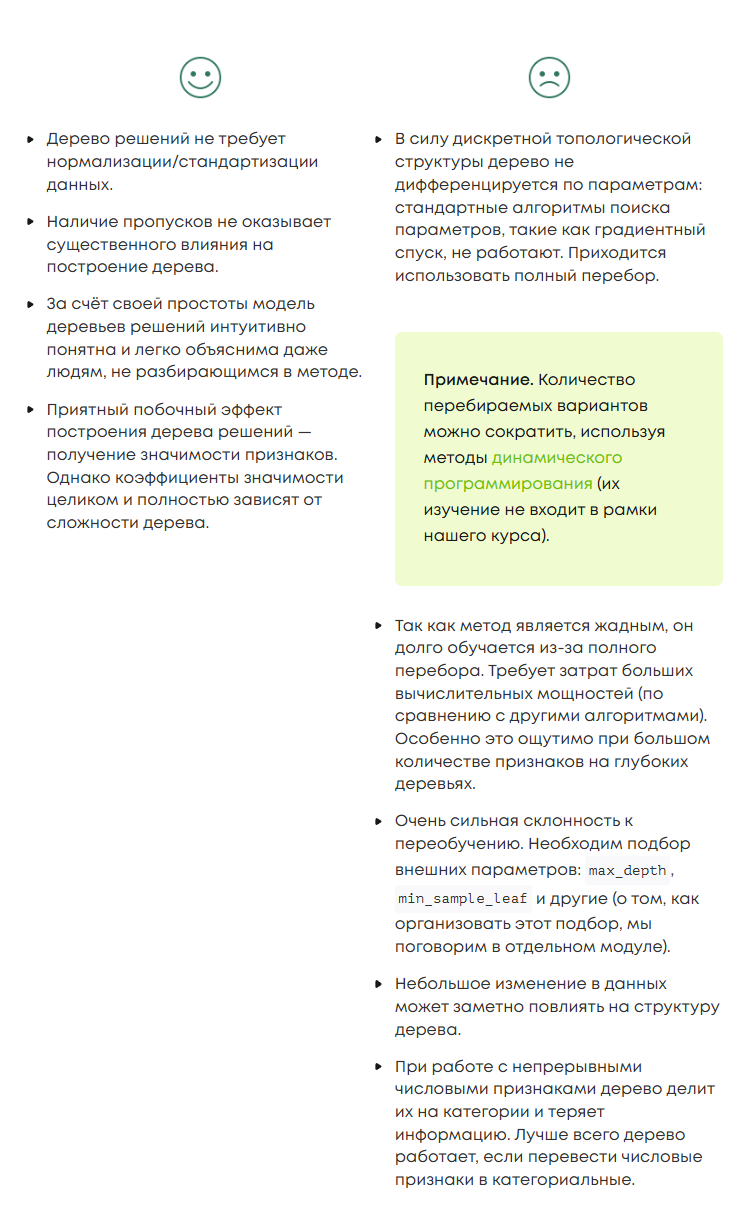

# Введение в ансамбли: бэггинг. Случайный лес

**Ансамблевые модели** или просто ансамбли (ensembles) — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

Ансамбли — передовые алгоритмы для решения сложных задач машинного обучения. Сегодня они и нейронные сети являются главными конкурентами и дают наилучшие результаты, благодаря чему используются крупными компаниями в продакшене.

Существует три проверенных способа построения ансамблей:

* Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
* Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
* Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

## БЭГГИНГ. ОСНОВНЫЕ ИДЕИ
Бэггинг (bagging) — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется бутстрэпом (bootstrap). Идея бутстрэпа заключается в генерации k выборок размера n (бутстрэп-выборок) из исходного набора данных размера m путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Схематично работу метода можно представить следующим образом:
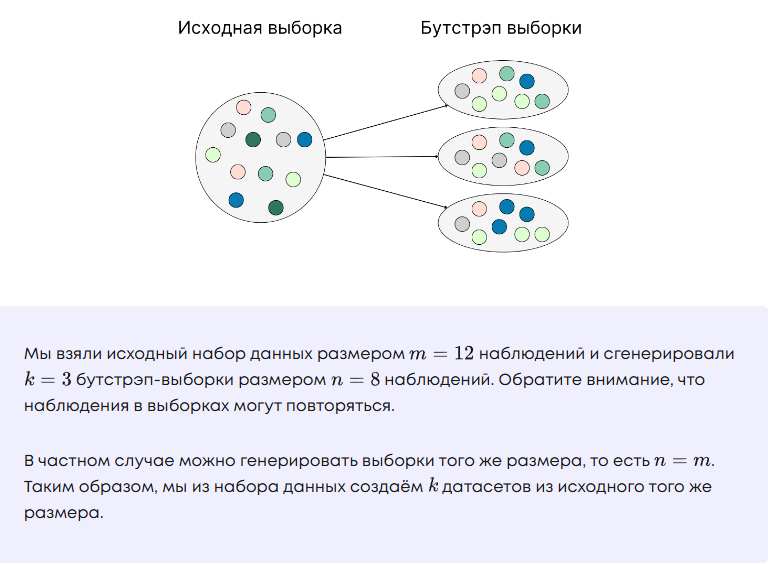
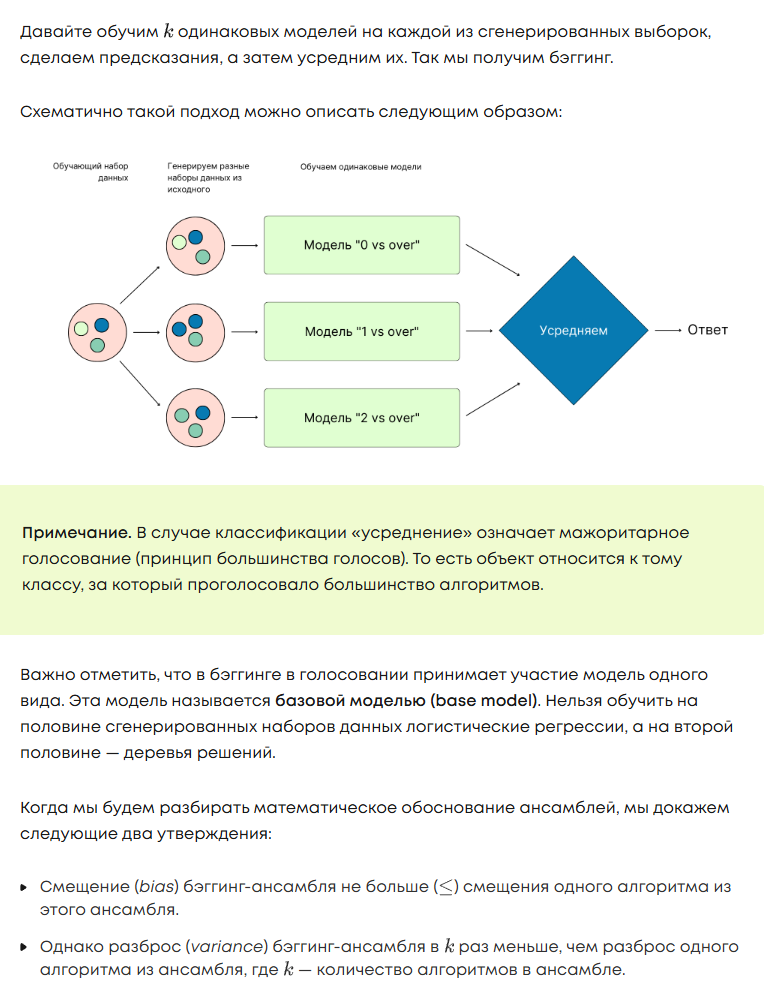

## СЛУЧАЙНЫЙ ЛЕС
**Случайный лес** (Random Forest) — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

Помимо бутстрэпа, случайный лес использует метод случайных подпространств. Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

## Алгоритм построения случайного леса для задачи КЛАССИФИКАЦИИ
Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

С помощью бутстрэпа создать K наборов данных размера (N, M).
Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
На каждом наборе данных обучить дерево решений.
Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

Ниже приведена схема работы описанного алгоритма для решения задачи классификации. Для простоты лес состоит из четырёх деревьев (K=4).
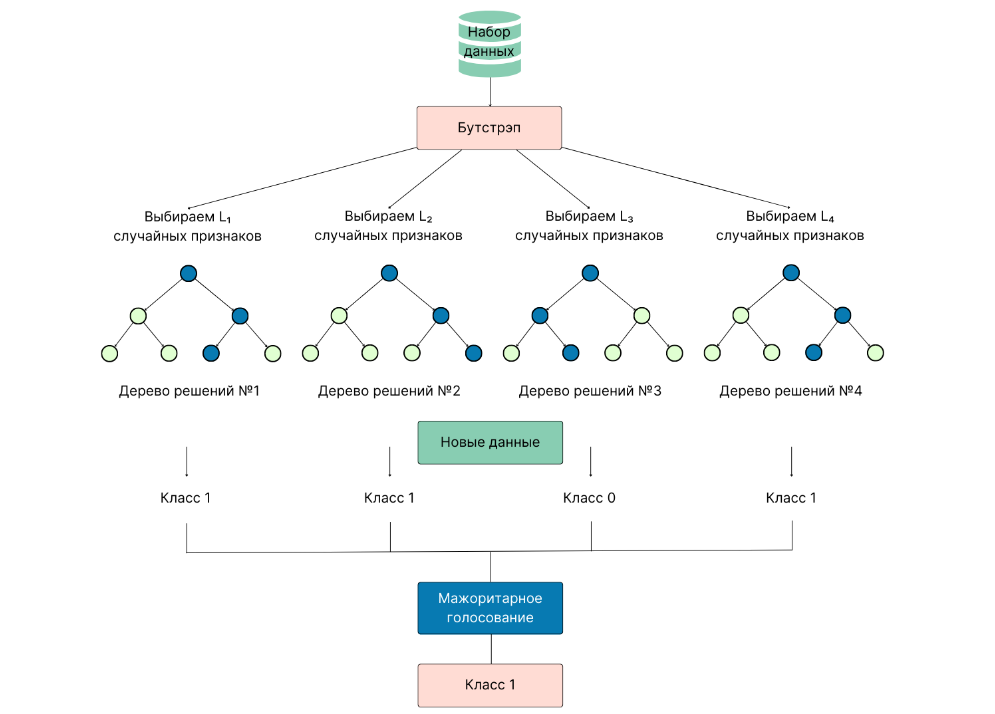

## СЛУЧАЙНЫЙ ЛЕС В SKLEARN
см.3.3Введение_в_ансамбли_бэггинг._Случайный_лес
